#Installing libraries



In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 841.8 kB/s eta 0:00:00
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

#Search for Target protein

In [ ]:
target = new_client.target
target_query = target.search('TLR4')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,TLR4-MD2,18.0,False,CHEMBL4106126,"[{'accession': 'O00206', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1,"[{'xref_id': 'O00206', 'xref_name': None, 'xre...",Homo sapiens,Toll-like receptor 4,16.0,False,CHEMBL5255,"[{'accession': 'O00206', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'Q9QUK6', 'xref_name': None, 'xre...",Mus musculus,Toll-like receptor 4,16.0,False,CHEMBL1795167,"[{'accession': 'Q9QUK6', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Rattus norvegicus,Toll-like receptor 4,16.0,False,CHEMBL4523480,"[{'accession': 'Q9QX05', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Homo sapiens,Toll-like receptor 4/MD-2,12.0,False,CHEMBL3038512,"[{'accession': 'O00206', 'component_descriptio...",PROTEIN COMPLEX,9606
5,[],Mus musculus,Toll-like receptor 4/Ly96,12.0,False,CHEMBL4296082,"[{'accession': 'Q9QUK6', 'component_descriptio...",PROTEIN COMPLEX,10090
6,[],Mus musculus,Toll-like receptor 4/MD-2/CD14,10.0,False,CHEMBL3038514,"[{'accession': 'Q9QUK6', 'component_descriptio...",PROTEIN COMPLEX,10090
7,[],Homo sapiens,Toll-like receptor 4/MD-2/CD14,8.0,False,CHEMBL3038513,"[{'accession': 'O00206', 'component_descriptio...",PROTEIN COMPLEX,9606


#Select and retrieve bioactivity data for Human MS

In [ ]:
selected_target = targets.target_chembl_id[1]
selected_target     

'CHEMBL5255'

In [ ]:
activity = new_client.activity
reselected = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(reselected)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1660297,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.35
1,None,1660307,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.25
2,None,1660308,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.08
3,None,1660309,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.16
4,None,1688982,[],CHEMBL867199,Inhibition of induction of NF-kappaB by LPS in...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,None,23235339,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.73
146,None,23235340,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.56
147,None,23235341,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.85
148,None,23235342,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,2.66


In [ ]:
df.to_csv('TLR4_1_bioactivity_data_raw.csv', index=False)

#Handling missing data

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [ ]:
df1 = df[df.standard_value.notna()]
df1 = df1[df.canonical_smiles.notna()]
df1

<ipython-input-9-0505691090ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1660297,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.35
1,None,1660307,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.25
2,None,1660308,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.08
3,None,1660309,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.16
4,None,1688982,[],CHEMBL867199,Inhibition of induction of NF-kappaB by LPS in...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,None,23235339,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.73
146,None,23235340,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.56
147,None,23235341,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.85
148,None,23235342,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,2.66


In [ ]:
len(df1.canonical_smiles.unique())

89

In [ ]:
df1_dropedS = df1.drop_duplicates(['canonical_smiles'])
df1_dropedS

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1660297,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.35
1,None,1660307,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.25
2,None,1660308,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.08
3,None,1660309,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.16
4,None,1688982,[],CHEMBL867199,Inhibition of induction of NF-kappaB by LPS in...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,None,23235339,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.73
146,None,23235340,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.56
147,None,23235341,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.85
148,None,23235342,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,2.66


#Data pre-processing of the bioactivity data

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df2 = df1_dropedS[selection]
df2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,350.0
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,250.0
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,80.0
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,160.0
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,1230.0
...,...,...,...
145,CHEMBL4863840,CCCC1CCC([C@@H]2CCC3=CC(=O)CC(=O)C3C2)CC1,730.0
146,CHEMBL4875156,O=C1C=C2CC[C@@H](NC(=O)OCc3ccccc3)CC2C(=O)C1,560.0
147,CHEMBL4858342,O=C1C=C2CCCCC2C(=O)CC1,1850.0
148,CHEMBL4849737,C[C@H]1CCC2C(=O)CCC(=O)C=C2C1,2660.0


In [ ]:
df2.to_csv('TLR4_2_bioactivity_data_preprocessed.csv', index=False)

#Labeling compounds as either being active, inactive or intermediate

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate

In [ ]:
df3 = pd.read_csv('TLR4_2_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,350.0,active
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,250.0,active
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,80.0,active
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,160.0,active
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,1230.0,intermediate
...,...,...,...,...
84,CHEMBL4863840,CCCC1CCC([C@@H]2CCC3=CC(=O)CC(=O)C3C2)CC1,730.0,active
85,CHEMBL4875156,O=C1C=C2CC[C@@H](NC(=O)OCc3ccccc3)CC2C(=O)C1,560.0,active
86,CHEMBL4858342,O=C1C=C2CCCCC2C(=O)CC1,1850.0,intermediate
87,CHEMBL4849737,C[C@H]1CCC2C(=O)CCC(=O)C=C2C1,2660.0,intermediate


In [ ]:
df4.to_csv('TLR4_3_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip TLR4.zip *.csv

  adding: TLR4_1_bioactivity_data_raw.csv (deflated 89%)
  adding: TLR4_2_bioactivity_data_preprocessed.csv (deflated 76%)
  adding: TLR4_3_bioactivity_data_curated.csv (deflated 78%)


In [ ]:
! ls -l

total 124
drwxr-xr-x 1 root root  4096 Feb  1 14:33 sample_data
-rw-r--r-- 1 root root 81303 Feb  3 12:59 TLR4_1_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  8273 Feb  3 12:59 TLR4_2_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  9152 Feb  3 12:59 TLR4_3_bioactivity_data_curated.csv
-rw-r--r-- 1 root root 13660 Feb  3 12:59 TLR4.zip


#Install conda and rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
     

--2023-02-03 12:59:20--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   155MB/s    in 0.5s    

2023-02-03 12:59:20 (155 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [ ]:
df5=pd.read_csv('TLR4_3_bioactivity_data_curated.csv')
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,350.0,active
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,250.0,active
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,80.0,active
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,160.0,active
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,1230.0,intermediate
...,...,...,...,...
84,CHEMBL4863840,CCCC1CCC([C@@H]2CCC3=CC(=O)CC(=O)C3C2)CC1,730.0,active
85,CHEMBL4875156,O=C1C=C2CC[C@@H](NC(=O)OCc3ccccc3)CC2C(=O)C1,560.0,active
86,CHEMBL4858342,O=C1C=C2CCCCC2C(=O)CC1,1850.0,intermediate
87,CHEMBL4849737,C[C@H]1CCC2C(=O)CCC(=O)C=C2C1,2660.0,intermediate


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,canonical_smiles
0,None,1660297,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.35,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...
1,None,1660307,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.25,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...
2,None,1660308,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.08,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...
3,None,1660309,[],CHEMBL854334,Antagonistic potency at human TLR4 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.16,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...
4,None,1688982,[],CHEMBL867199,Inhibition of induction of NF-kappaB by LPS in...,F,None,None,BAO_0000190,BAO_0000219,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.23,CC[C@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,None,23235339,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.73,CCCC1CCC([C@@H]2CCC3=CC(=O)CC(=O)C3C2)CC1
146,None,23235340,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.56,O=C1C=C2CC[C@@H](NC(=O)OCc3ccccc3)CC2C(=O)C1
147,None,23235341,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,1.85,O=C1C=C2CCCCC2C(=O)CC1
148,None,23235342,[],CHEMBL4827931,Inhibition of TLR4 (unknown origin) by sandwic...,B,None,None,BAO_0000190,BAO_0000357,...,Toll-like receptor 4,9606,None,None,IC50,uM,UO_0000065,None,2.66,C[C@H]1CCC2C(=O)CCC(=O)C=C2C1


#Calculate Lipinski descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

    Molecular weight < 500 Dalton
    Octanol-water partition coefficient (LogP) < 5
    Hydrogen bond donors < 5
    Hydrogen bond acceptors < 10


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,955.265,11.6711,5.0,10.0
1,955.265,11.6711,5.0,10.0
2,955.265,11.6711,5.0,10.0
3,955.265,11.6711,5.0,10.0
4,1203.499,-5.2448,18.0,18.0
...,...,...,...,...
145,288.431,4.4775,0.0,2.0
146,313.353,2.5498,1.0,4.0
147,178.231,2.0350,0.0,2.0
148,192.258,2.2810,0.0,2.0


#Combine DataFrames

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,955.265,11.6711,5.0,10.0
1,955.265,11.6711,5.0,10.0
2,955.265,11.6711,5.0,10.0
3,955.265,11.6711,5.0,10.0
4,1203.499,-5.2448,18.0,18.0
...,...,...,...,...
145,288.431,4.4775,0.0,2.0
146,313.353,2.5498,1.0,4.0
147,178.231,2.0350,0.0,2.0
148,192.258,2.2810,0.0,2.0


In [ ]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,350.0,active
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,250.0,active
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,80.0,active
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,160.0,active
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,1230.0,intermediate
...,...,...,...,...
84,CHEMBL4863840,CCCC1CCC([C@@H]2CCC3=CC(=O)CC(=O)C3C2)CC1,730.0,active
85,CHEMBL4875156,O=C1C=C2CC[C@@H](NC(=O)OCc3ccccc3)CC2C(=O)C1,560.0,active
86,CHEMBL4858342,O=C1C=C2CCCCC2C(=O)CC1,1850.0,intermediate
87,CHEMBL4849737,C[C@H]1CCC2C(=O)CCC(=O)C=C2C1,2660.0,intermediate


In [ ]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,350.0,active,955.265,11.6711,5.0,10.0
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,250.0,active,955.265,11.6711,5.0,10.0
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,80.0,active,955.265,11.6711,5.0,10.0
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,160.0,active,955.265,11.6711,5.0,10.0
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,1230.0,intermediate,1203.499,-5.2448,18.0,18.0
...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,288.431,4.4775,0.0,2.0
146,NaN,NaN,NaN,NaN,313.353,2.5498,1.0,4.0
147,NaN,NaN,NaN,NaN,178.231,2.0350,0.0,2.0
148,NaN,NaN,NaN,NaN,192.258,2.2810,0.0,2.0


#Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

    Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10

Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count        89.000000
mean      21598.100000
std       38511.987278
min           1.500000
25%        1300.000000
50%        6110.000000
75%       25900.000000
max      190000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
       if i > 100000000:
         i = 100000000
         
       norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-36-707569d44c20>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,350.0
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,active,955.265,11.6711,5.0,10.0,250.0
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,80.0
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,active,955.265,11.6711,5.0,10.0,160.0
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,intermediate,1203.499,-5.2448,18.0,18.0,1230.0
...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,288.431,4.4775,0.0,2.0,NaN
146,NaN,NaN,NaN,313.353,2.5498,1.0,4.0,NaN
147,NaN,NaN,NaN,178.231,2.0350,0.0,2.0,NaN
148,NaN,NaN,NaN,192.258,2.2810,0.0,2.0,NaN


In [ ]:
df_norm.standard_value_norm.describe()

count        89.000000
mean      21598.100000
std       38511.987278
min           1.500000
25%        1300.000000
50%        6110.000000
75%       25900.000000
max      190000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-32-715877a2f74e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,6.455932
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,active,955.265,11.6711,5.0,10.0,6.602060
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,7.096910
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,active,955.265,11.6711,5.0,10.0,6.795880
4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,intermediate,1203.499,-5.2448,18.0,18.0,5.910095
...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,288.431,4.4775,0.0,2.0,NaN
146,NaN,NaN,NaN,313.353,2.5498,1.0,4.0,NaN
147,NaN,NaN,NaN,178.231,2.0350,0.0,2.0,NaN
148,NaN,NaN,NaN,192.258,2.2810,0.0,2.0,NaN


In [ ]:
df_final.pIC50.describe()

count    89.000000
mean      5.404689
std       1.122053
min       3.721246
25%       4.586700
50%       5.213959
75%       5.886057
max       8.823909
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('TLR4_4_bioactivity_data_3class_pIC50.csv')

#Removing the 'intermediate' bioactivity class

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,6.455932
1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,active,955.265,11.6711,5.0,10.0,6.602060
2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,7.096910
3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,active,955.265,11.6711,5.0,10.0,6.795880
5,CHEMBL540367,CCCCCCCCCCCCCCOc1c(/C=N/N=C(N)N)ccc(/C=N/N=C(N...,inactive,671.032,9.0610,4.0,6.0,3.721246
...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,288.431,4.4775,0.0,2.0,NaN
146,NaN,NaN,NaN,313.353,2.5498,1.0,4.0,NaN
147,NaN,NaN,NaN,178.231,2.0350,0.0,2.0,NaN
148,NaN,NaN,NaN,192.258,2.2810,0.0,2.0,NaN


In [ ]:
df_2class.to_csv('TLR4_5_bioactivity_data_2class_pIC50.csv')

#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

#Frequency plot of the 2 bioactivity classes

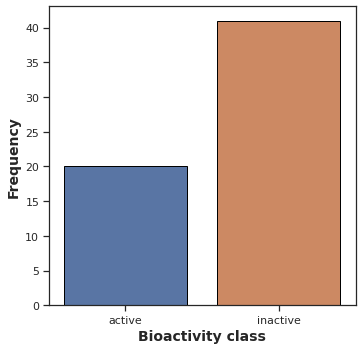

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#Scatter plot of MW versus LogP

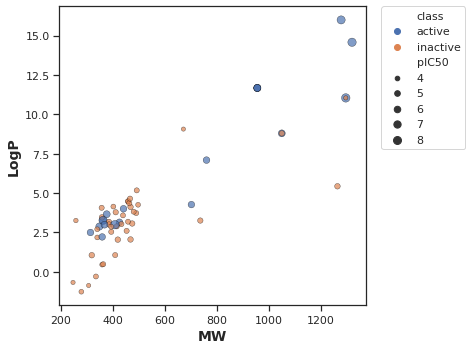

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

#Box plots

pIC50 value

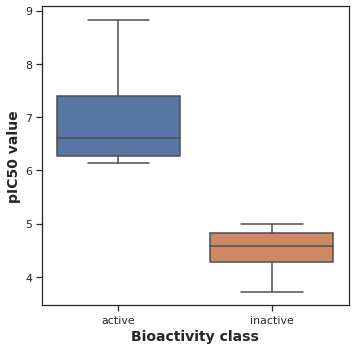

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')
     


#Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,820.0,3.125921e-10,0.05,Different distribution (reject H0)


#MW

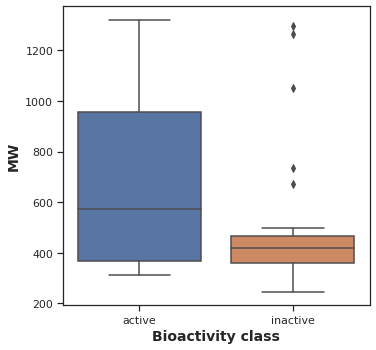

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,517.0,0.101734,0.05,Same distribution (fail to reject H0)


#LogP

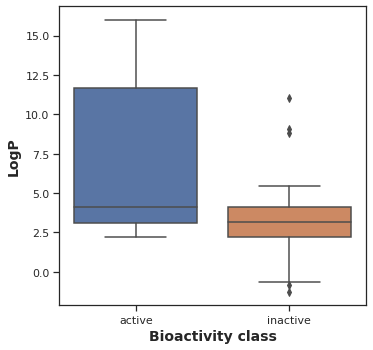

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,582.0,0.008406,0.05,Different distribution (reject H0)


#NumHDonors

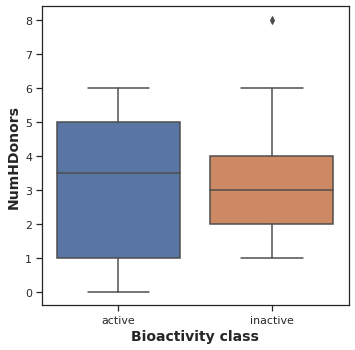

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')
     


Statistical analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,443.0,0.611276,0.05,Same distribution (fail to reject H0)


#NumHAcceptors

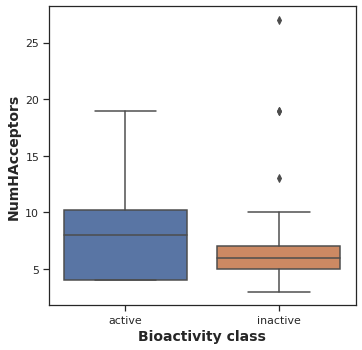

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,468.0,0.369075,0.05,Same distribution (fail to reject H0)


#Interpretation of Statistical Results


Box Plots

pIC50 values

Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.
Lipinski's descriptors

All of the 4 Lipinski's descriptors exhibited *statistically significant difference* between the actives and inactives.


#Zip files

In [ ]:
! zip -r results.zip . -i *.csv *.pdf
     

  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: TLR4_1_bioactivity_data_raw.csv (deflated 89%)
  adding: plot_MW_vs_LogP.pdf (deflated 19%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: TLR4_5_bioactivity_data_2class_pIC50.csv (deflated 70%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: TLR4_4_bioactivity_data_3class_pIC50.csv (deflated 71%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: TLR4_3_bioactivity_data_curated.csv (deflated 78%)
  adding: TLR4_2_bioactivity_data_preprocessed.csv (deflated 76%)


#Download PaDEL-Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-02-03 13:00:38--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-02-03 13:00:38--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-02-03 13:00:39 (183 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-02-03 13:00:39--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
df6 = pd.read_csv("TLR4_4_bioactivity_data_3class_pIC50.csv")

In [ ]:
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL382272,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,6.455932
1,1,CHEMBL200140,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)O...,active,955.265,11.6711,5.0,10.0,6.602060
2,2,CHEMBL200667,CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC...,active,955.265,11.6711,5.0,10.0,7.096910
3,3,CHEMBL200398,CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(...,active,955.265,11.6711,5.0,10.0,6.795880
4,4,CHEMBL3989738,CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,intermediate,1203.499,-5.2448,18.0,18.0,5.910095
...,...,...,...,...,...,...,...,...,...
145,145,NaN,NaN,NaN,288.431,4.4775,0.0,2.0,NaN
146,146,NaN,NaN,NaN,313.353,2.5498,1.0,4.0,NaN
147,147,NaN,NaN,NaN,178.231,2.0350,0.0,2.0,NaN
148,148,NaN,NaN,NaN,192.258,2.2810,0.0,2.0,NaN


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@@H](CCCCCCC)OC(=O)CCCCCCCCCCC)COP(=O)(O)OCCNC(=O)C(Cc1ccc(O)cc1)C(=O)O	CHEMBL382272
CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@@H](CCCCCCC)OC(=O)CCCCCCCCCCC)COP(=O)(O)OCCNC(=O)C(Cc1ccc(O)cc1)C(=O)O	CHEMBL200140
CCCCCCCCCCCCCC(=O)N[C@@H](COCC[C@H](CCCCCCC)OC(=O)CCCCCCCCCCC)COP(=O)(O)OCCNC(=O)C(Cc1ccc(O)cc1)C(=O)O	CHEMBL200667
CCCCCCCCCCCCCC(=O)N[C@H](COCC[C@H](CCCCCCC)OC(=O)CCCCCCCCCCC)COP(=O)(O)OCCNC(=O)C(Cc1ccc(O)cc1)C(=O)O	CHEMBL200398
CC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C@@H](CCN)C(=O)N[C@H]1CCNC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCN)NC(=O)[C@H](CCN)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H](CCN)NC1=O)[C@@H](C)O.CC[C@H](C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C@@H](CCN)C(=O)N[C@H]1CCNC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCN)NC(=O)[C@H](CCN)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H](CCN)NC1=O)[C@@H](C)O	CHEMBL3989738


In [ ]:
! cat molecule.smi | wc -l
     


150


#Calculate fingerprint descriptors

Calculate PaDEL descriptors

In [ ]:
! cat padel.sh
     


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh
     


Processing CHEMBL382272 in molecule.smi (1/89). 
Processing CHEMBL200140 in molecule.smi (2/89). 
Processing CHEMBL200667 in molecule.smi (3/89). Average speed: 6.91 s/mol.
Processing CHEMBL200398 in molecule.smi (4/89). Average speed: 3.47 s/mol.
Processing CHEMBL3989738 in molecule.smi (5/89). Average speed: 2.92 s/mol.
Processing CHEMBL540367 in molecule.smi (6/89). Average speed: 2.23 s/mol.
Processing CHEMBL535384 in molecule.smi (7/89). Average speed: 2.03 s/mol.
Processing CHEMBL537642 in molecule.smi (8/89). Average speed: 1.78 s/mol.
Processing CHEMBL537866 in molecule.smi (9/89). Average speed: 1.59 s/mol.
Processing CHEMBL537865 in molecule.smi (10/89). Average speed: 1.40 s/mol.
Processing CHEMBL537645 in molecule.smi (11/89). Average speed: 1.29 s/mol.
Processing CHEMBL534488 in molecule.smi (12/89). Average speed: 1.17 s/mol.
Processing CHEMBL538329 in molecule.smi (13/89). Average speed: 1.08 s/mol.
Processing CHEMBL534490 in molecule.smi (14/89). Average speed: 0.99 s/m

In [ ]:
! ls -l
     


total 108820
-rw-r--r-- 1 root root   169557 Feb  3 13:01 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Feb  3 13:00 __MACOSX
-rw-r--r-- 1 root root      119 Feb  3 13:00 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Feb  3 13:00 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Feb  3 13:00 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      127 Feb  3 13:00 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      123 Feb  3 13:00 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root     7706 Feb  3 13:00 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Feb  3 13:00 padel.sh
-rw-r--r-- 1 root root 25768637 Feb  3 13:00 padel.zip
-rw-r--r-- 1 root root    13849 Feb  3 13:00 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    14627 Feb  3 13:00 plot_ic50.pdf
-rw-r--r-- 1 root root    13164 Feb  3 13:00 plot_LogP.pdf
-rw-r--r-- 1 r

#Preparing the X and Y Data Matrices

X data matrix

In [ ]:
df6_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df6_X
     


,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL382272,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL200140,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL200398,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL200667,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL540367,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,CHEMBL4875156,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,CHEMBL4863840,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,CHEMBL4858342,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,CHEMBL4849737,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6_X = df6_X.drop(columns=['Name'])
df6_X
     


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
85,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
86,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#Y variable

In [ ]:
df6_Y = df6['pIC50']
df6_Y

0      6.455932
1      6.602060
2      7.096910
3      6.795880
4      5.910095
         ...   
145         NaN
146         NaN
147         NaN
148         NaN
149         NaN
Name: pIC50, Length: 150, dtype: float64

#Combining X and Y variable

In [ ]:
dataset = pd.concat([df6_X,df6_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.455932
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.602060
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.096910
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.795880
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.910095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.to_csv('TLR4_6_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df7 = pd.read_csv('TLR4_6_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df8=df7.dropna(axis=0)

#Input features

In [ ]:
X = df8.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Output features

In [ ]:
Y = df8.pIC50
Y

0     6.455932
1     6.602060
2     7.096910
3     6.795880
4     5.910095
        ...   
84    6.136677
85    6.251812
86    5.732828
87    5.575118
88    5.982967
Name: pIC50, Length: 89, dtype: float64

Let's examine the data dimension

In [ ]:
X.shape

(89, 881)

In [ ]:
Y.shape

(89,)

#Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(89, 194)

#Data split (80/20 ratio)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((71, 194), (71,))

In [ ]:
X_test.shape, Y_test.shape

((18, 194), (18,))

# Building a Regression Model using Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.395935926211073

In [ ]:
Y_pred = model.predict(X_test)


#Scatter Plot of Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

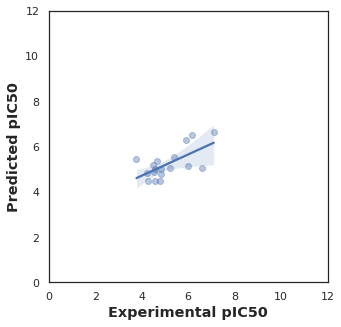

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show



In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 6.8 MB/s 
     |████████████████████████████████| 24.8 MB 55.7 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 297 kB 42.7 MB/s 
     |████████████████████████████████| 255.9 MB 42 kB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

#Compare ML algorithms

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)
     

 93%|█████████▎| 39/42 [00:29<00:00,  5.69it/s]

[13:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:29<00:00,  1.41it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:18<00:00,  2.27it/s]

[13:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,49881383769563475292328951727353908853305543877...,-8836130839179815305611398112206842120790851748...,10877754371048120666633026907220648786875803238...,0.34
KernelRidge,13.74,-21.56,5.50,0.07
QuantileRegressor,1.58,-0.03,1.18,0.56
LassoLars,1.56,0.00,1.16,0.05
DummyRegressor,1.56,0.00,1.16,0.04
Lasso,1.56,0.00,1.16,0.08
ElasticNet,1.50,0.12,1.09,0.03
LarsCV,1.40,0.30,0.97,1.74
OrthogonalMatchingPursuitCV,1.33,0.41,0.89,0.13


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,79975485810618755185470756750894089992024916267...,-8326859404987952524441886622963027385257710025...,79720948461818356085324700821220489279105169770...,0.22
LinearRegression,170735507005572527423488.00,-1777657925881549327171584.00,1164812272708.42,0.02
TransformedTargetRegressor,170735507005572527423488.00,-1777657925881549327171584.00,1164812272708.42,0.04
KernelRidge,4.73,-37.79,5.44,0.05
GaussianProcessRegressor,2.69,-16.55,3.66,0.04
LassoLarsCV,1.98,-9.16,2.78,0.15
LinearSVR,1.26,-1.66,1.42,0.07
PassiveAggressiveRegressor,1.20,-1.05,1.25,0.02
HuberRegressor,1.18,-0.86,1.19,0.15


#Data visualization of model performance

[(0.0, 1.0)]

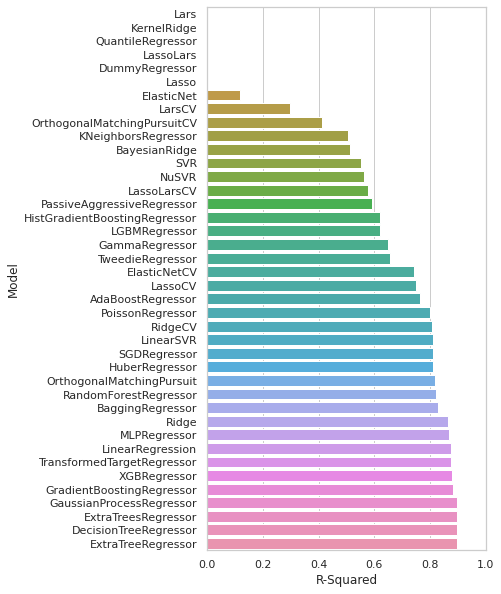

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
     


[(0.0, 10.0)]

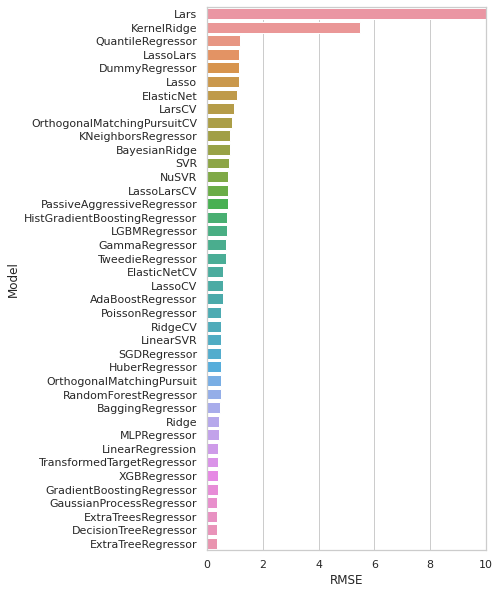

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
     


[(0.0, 10.0)]

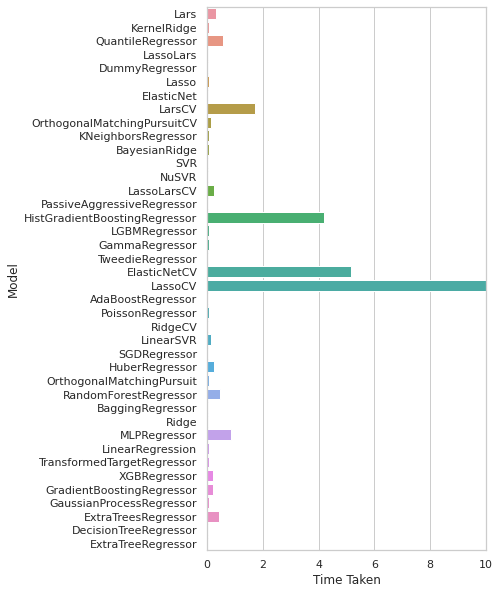

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
     


#QSAR Model Building of Acetylcholinesterase Inhibitors

#Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    
    return input_data[input_data.columns[selection.get_support(indices=True)]]
X = pd.DataFrame(X)
X = remove_low_variance(X, threshold=0.1)
X



,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
85,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X.to_csv('descriptor_list.csv', index = False)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.822994913078058

#Model Prediction

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([6.70872226, 6.70872226, 6.70872226, 6.70872226, 4.86692272,
       4.86692272, 5.14148904, 5.85153329, 4.75840627, 4.89910669,
       4.44292102, 4.75840627, 4.47838206, 4.11781747, 4.41510598,
       4.20526775, 7.73720127, 6.41904819, 6.88107705, 7.07691574,
       5.50284753, 5.48323302, 6.3703512 , 6.5517686 , 6.41904819,
       8.40202497, 4.19483465, 4.43091694, 4.55920857, 4.83873448,
       5.6678133 , 5.97040507, 5.52018357, 5.77799028, 5.77799028,
       5.88107777, 5.77799028, 4.32999269, 4.43214361, 4.55558375,
       4.62187791, 4.68336748, 4.39105138, 4.43214361, 4.86004757,
       4.81456931, 4.60584363, 4.86004757, 4.62677172, 4.68268602,
       4.58159358, 5.25988548, 5.25988548, 4.90342364, 4.57238895,
       5.25988548, 5.02349257, 4.68910572, 4.68910572, 4.69509851,
       6.41904819, 8.40202497, 4.80278323, 4.89273311, 5.53472201,
       5.55668088, 5.90171653, 6.20977782, 5.59416101, 5.43568555,
       5.58209987, 5.59416101, 5.28831268, 5.58209987, 5.40543

#Model Performance

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.22
Coefficient of determination (R^2): 0.82


#Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

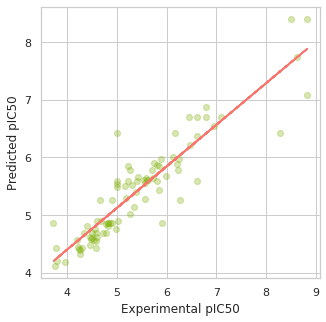

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')


#Save Model as Pickle Object

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('TLR4_model.pkl', 'wb'))